In [6]:
import numpy as np
def rand():
    return np.random.rand()
for i in range(10):
    print(rand())

0.0624495459882507
0.6657356567137848
0.28491363222244814
0.0009804604348400137
0.6199307970172352
0.09340938955761258
0.3031676010301453
0.9661423219016738
0.2063382525531655
0.4798954676106254


(array([71., 68., 63., 42., 55., 43., 45., 42., 43., 37., 39., 24., 27.,
        32., 34., 33., 32., 29., 26., 15., 26., 20., 21., 26., 21., 22.,
        20., 16., 17., 11.]),
 array([ 50.0773294 ,  55.07307101,  60.06881262,  65.06455424,
         70.06029585,  75.05603747,  80.05177908,  85.0475207 ,
         90.04326231,  95.03900393, 100.03474554, 105.03048716,
        110.02622877, 115.02197039, 120.017712  , 125.01345361,
        130.00919523, 135.00493684, 140.00067846, 144.99642007,
        149.99216169, 154.9879033 , 159.98364492, 164.97938653,
        169.97512815, 174.97086976, 179.96661138, 184.96235299,
        189.95809461, 194.95383622, 199.94957783]),
 <BarContainer object of 30 artists>)

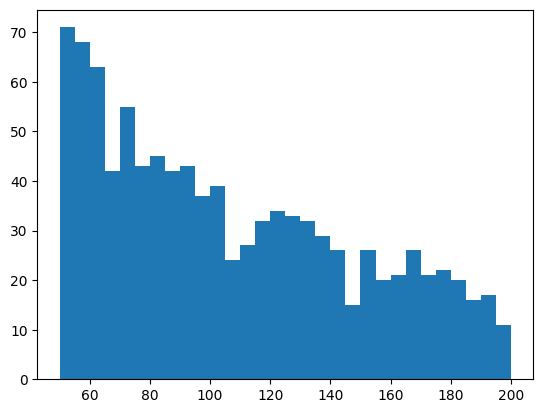

In [7]:
n_samples = [50 * 4 ** rand() for i in range(1000)]
import matplotlib.pyplot as plt
plt.hist(n_samples, bins=30)

n = 10
[3, 17, 2, 26, 4, 5, 1, 4, 3, 35]
100


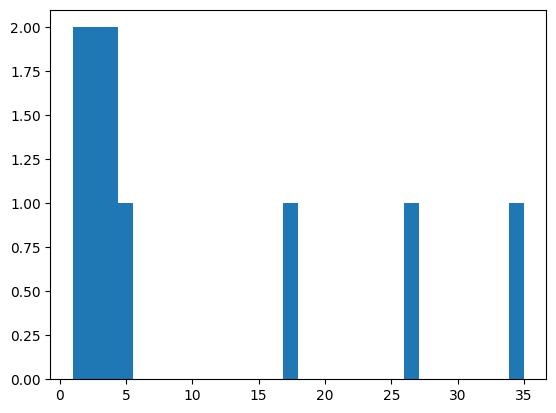

In [17]:
def gen_r():
    import random

    #x = int(50 * 4 ** rand()) - 1  # replace with the desired number of samples
    x = 10
    distinct_values = random.sample(range(1, 100), x-1)
    distinct_values.append(0)
    distinct_values.append(100)
    q = sorted(distinct_values)
    r = [q[i+1] - q[i] for i in range(len(q)-1)]
    print("n = {}".format(x))
    print(r)
    return r

r = gen_r()
plt.hist(r, bins=30)
print(sum(r))

In [22]:
import optuna
import numpy as np
def suggest_normalized_list(trial, n, total_sum):
    values = [trial.suggest_float(f'x{i}', 0, 1) for i in range(n)]
    values = np.array(values)
    values /= values.sum()
    values *= total_sum
    return values

r = gen_r()
print(r)

def objective(trial):
    n = 10  # 要素数
    total_sum = 100  # 総和 S
    used_sum = 70
    X = suggest_normalized_list(trial, n, used_sum)
    
    # 假の評価関数: ここに最適化したい関数を定義する
    score = 0
    for i in range(n):
        d = 1 - min(X[i], r[i]) / max(X[i], r[i])
        p = 1 - d * d
        score += p / n
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

print(f"Best trial: {study.best_trial}")
print(f"Best parameters: {study.best_trial.params}")
opt_r = [0 for _ in range(10)]
total_param = 0
for k, v in study.best_trial.params.items():
    opt_r[int(k[1:])] = v
    total_param += v
for i in range(10):
    opt_r[i] /= total_param
print(f"r = {r}")
print(f"opt_r = {np.array(opt_r) / sum(opt_r)}")
normalized_r = np.array(r) / sum(r)
print(f"normalized_r = {normalized_r}")

[I 2024-05-28 00:13:50,509] A new study created in memory with name: no-name-aa63e6be-b37f-4a78-8ab8-3888c3975c05
[I 2024-05-28 00:13:50,513] Trial 0 finished with value: 0.692402960560832 and parameters: {'x0': 0.30648319687669734, 'x1': 0.6375804112322332, 'x2': 0.7047091318366698, 'x3': 0.5900948694565372, 'x4': 0.4050239276568751, 'x5': 0.8083940655497989, 'x6': 0.09793511262407628, 'x7': 0.43209926610533833, 'x8': 0.9364071115152706, 'x9': 0.9442986702404931}. Best is trial 0 with value: 0.692402960560832.
[I 2024-05-28 00:13:50,515] Trial 1 finished with value: 0.42231023116106015 and parameters: {'x0': 0.12981819256903238, 'x1': 0.025458808470806282, 'x2': 0.4906955028717511, 'x3': 0.07264509125152518, 'x4': 0.1845814563268786, 'x5': 0.48287580247299433, 'x6': 0.09166046341693268, 'x7': 0.7033141321198627, 'x8': 0.9519182025168323, 'x9': 0.05821818076178653}. Best is trial 0 with value: 0.692402960560832.
[I 2024-05-28 00:13:50,517] Trial 2 finished with value: 0.50913105187749 

n = 10
[3, 5, 4, 8, 11, 2, 30, 5, 4, 28]
[3, 5, 4, 8, 11, 2, 30, 5, 4, 28]


[I 2024-05-28 00:13:50,734] Trial 15 finished with value: 0.6643191918057618 and parameters: {'x0': 0.6144756228211636, 'x1': 0.3918550133545804, 'x2': 0.2109852173682908, 'x3': 0.9132236349155317, 'x4': 0.7465796714961641, 'x5': 0.43057098955863393, 'x6': 0.4576426698898488, 'x7': 0.0033406834396715324, 'x8': 0.3133305812228436, 'x9': 0.4625410816446451}. Best is trial 9 with value: 0.7289990352007979.
[I 2024-05-28 00:13:50,763] Trial 16 finished with value: 0.6170547077874565 and parameters: {'x0': 0.4593904345868835, 'x1': 0.4044342559330439, 'x2': 0.027958641530697326, 'x3': 0.6935361873341382, 'x4': 0.2599611363128909, 'x5': 0.681666847534304, 'x6': 0.7207304306942235, 'x7': 0.2839254205083379, 'x8': 0.6612868748141746, 'x9': 0.2452091647750873}. Best is trial 9 with value: 0.7289990352007979.
[I 2024-05-28 00:13:50,792] Trial 17 finished with value: 0.7160489766525439 and parameters: {'x0': 0.7120486451357491, 'x1': 0.3157913505945957, 'x2': 0.34450930673694213, 'x3': 0.99316859

Best trial: FrozenTrial(number=947, state=1, values=[0.9377937980854402], datetime_start=datetime.datetime(2024, 5, 28, 0, 14, 36, 207255), datetime_complete=datetime.datetime(2024, 5, 28, 0, 14, 36, 272058), params={'x0': 0.12658661187942552, 'x1': 0.25259361191264584, 'x2': 0.1661274262775478, 'x3': 0.3293252470265934, 'x4': 0.34831343638679024, 'x5': 0.10715621613040101, 'x6': 0.6930682851804257, 'x7': 0.25806229519607116, 'x8': 0.18073672597915966, 'x9': 0.6391721414253186}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x0': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x1': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x2': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x3': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x4': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x5': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'x6': FloatDistribution(high=1.0, log=False, low=